In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [2]:
actions = ['head', 'shoulder', 'knee', 'clap', 'left_foot', 'right_foot', 'both_foot', 'yeah']

In [3]:
data = np.concatenate([np.load('dataset/seq_head_1673312096.npy'),
                       np.load('dataset/seq_head_1673312167.npy'),
                       np.load('dataset/seq_head_1673312288.npy'),
                       np.load('dataset/seq_head_1673312438.npy'),
                       np.load('dataset/seq_head_1673312530.npy'),  # head
                       np.load('dataset/seq_shoulder_1673312611.npy'),
                       np.load('dataset/seq_shoulder_1673312744.npy'),
                       np.load('dataset/seq_shoulder_1673312847.npy'),
                       np.load('dataset/seq_shoulder_1673312953.npy'),
                       np.load('dataset/seq_shoulder_1673313045.npy'),  # shoulder
                       np.load('dataset/seq_knee_1673313191.npy'),
                       np.load('dataset/seq_knee_1673313291.npy'),
                       np.load('dataset/seq_knee_1673313461.npy'),
                       np.load('dataset/seq_knee_1673313562.npy'),
                       np.load('dataset/seq_knee_1673313657.npy'),  # knee
                       np.load('dataset/seq_clap_1673313729.npy'),
                       np.load('dataset/seq_clap_1673313791.npy'),
                       np.load('dataset/seq_clap_1673313994.npy'),
                       np.load('dataset/seq_clap_1673314088.npy'),
                       np.load('dataset/seq_clap_1673313890.npy'),  # clap
                       np.load('dataset/seq_left_foot_1673314180.npy'),
                       np.load('dataset/seq_left_foot_1673314271.npy'),
                       np.load('dataset/seq_left_foot_1673314375.npy'),
                       np.load('dataset/seq_left_foot_1673314480.npy'),
                       np.load('dataset/seq_left_foot_1673314567.npy'),  # left_foot
                       np.load('dataset/seq_right_foot_1673314639.npy'),
                       np.load('dataset/seq_right_foot_1673314731.npy'),
                       np.load('dataset/seq_right_foot_1673314993.npy'),
                       np.load('dataset/seq_right_foot_1673315098.npy'),  # right_foot
                       np.load('dataset/seq_both_foot_1673315178.npy'),
                       np.load('dataset/seq_both_foot_1673315271.npy'),
                       np.load('dataset/seq_both_foot_1673315384.npy'),
                       np.load('dataset/seq_both_foot_1673315499.npy'),
                       np.load('dataset/seq_both_foot_1673315586.npy'),  # both_foot
                       np.load('dataset/seq_yeah_1673315644.npy'),
                       np.load('dataset/seq_yeah_1673315733.npy'),
                       np.load('dataset/seq_yeah_1673315848.npy'),
                       np.load('dataset/seq_yeah_1673315961.npy'),
                       np.load('dataset/seq_yeah_1673316050.npy'),  # yeah
                       ], axis=0)

In [4]:
data.shape

(35967, 30, 149)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

In [6]:
print(x_data.shape)
print(labels.shape)

(35967, 30, 148)
(35967,)


In [7]:
labels

array([0., 0., 0., ..., 7., 7., 7.])

In [8]:
y_data = to_categorical(labels, num_classes=len(actions))

In [9]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, stratify = y_data, random_state=2021)

In [11]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(28773, 30, 148) (28773, 8)
(7194, 30, 148) (7194, 8)


In [12]:
model = Sequential([LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
                    Dense(32, activation='relu'),
                    Dense(len(actions), activation='softmax')])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                54528     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
Total params: 56,872
Trainable params: 56,872
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200,
                    callbacks=[ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
                               ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')])

Epoch 1/200
900/900 [==============================] - ETA: 0s - loss: 1.5051 - acc: 0.6631
Epoch 1: val_acc improved from -inf to 0.75146, saving model to models\model.h5
900/900 [==============================] - 42s 39ms/step - loss: 1.5051 - acc: 0.6631 - val_loss: 0.6086 - val_acc: 0.7515 - lr: 0.0010
Epoch 2/200
899/900 [============================>.] - ETA: 0s - loss: 0.5173 - acc: 0.7885
Epoch 2: val_acc improved from 0.75146 to 0.78468, saving model to models\model.h5
900/900 [==============================] - 32s 35ms/step - loss: 0.5175 - acc: 0.7885 - val_loss: 0.5067 - val_acc: 0.7847 - lr: 0.0010
Epoch 3/200
900/900 [==============================] - ETA: 0s - loss: 0.4498 - acc: 0.8124
Epoch 3: val_acc improved from 0.78468 to 0.83472, saving model to models\model.h5
900/900 [==============================] - 33s 36ms/step - loss: 0.4498 - acc: 0.8124 - val_loss: 0.4011 - val_acc: 0.8347 - lr: 0.0010
Epoch 4/200
899/900 [============================>.] - ETA: 0s - loss:

897/900 [============================>.] - ETA: 0s - loss: 0.2669 - acc: 0.8950
Epoch 30: val_acc improved from 0.89797 to 0.90603, saving model to models\model.h5
900/900 [==============================] - 18s 20ms/step - loss: 0.2667 - acc: 0.8950 - val_loss: 0.2423 - val_acc: 0.9060 - lr: 0.0010
Epoch 31/200
898/900 [============================>.] - ETA: 0s - loss: 0.2567 - acc: 0.8992
Epoch 31: val_acc did not improve from 0.90603
900/900 [==============================] - 19s 21ms/step - loss: 0.2566 - acc: 0.8992 - val_loss: 0.2597 - val_acc: 0.8910 - lr: 0.0010
Epoch 32/200
898/900 [============================>.] - ETA: 0s - loss: 0.2321 - acc: 0.9100
Epoch 32: val_acc improved from 0.90603 to 0.91757, saving model to models\model.h5
900/900 [==============================] - 21s 24ms/step - loss: 0.2318 - acc: 0.9101 - val_loss: 0.2121 - val_acc: 0.9176 - lr: 0.0010
Epoch 33/200
898/900 [============================>.] - ETA: 0s - loss: 0.2310 - acc: 0.9131
Epoch 33: val_acc 

898/900 [============================>.] - ETA: 0s - loss: 0.0830 - acc: 0.9683
Epoch 58: val_acc improved from 0.97581 to 0.98235, saving model to models\model.h5
900/900 [==============================] - 20s 23ms/step - loss: 0.0832 - acc: 0.9683 - val_loss: 0.0520 - val_acc: 0.9823 - lr: 0.0010
Epoch 59/200
899/900 [============================>.] - ETA: 0s - loss: 0.0911 - acc: 0.9667
Epoch 59: val_acc did not improve from 0.98235
900/900 [==============================] - 27s 30ms/step - loss: 0.0911 - acc: 0.9667 - val_loss: 0.1178 - val_acc: 0.9534 - lr: 0.0010
Epoch 60/200
899/900 [============================>.] - ETA: 0s - loss: 0.0851 - acc: 0.9687
Epoch 60: val_acc did not improve from 0.98235
900/900 [==============================] - 21s 23ms/step - loss: 0.0852 - acc: 0.9687 - val_loss: 0.1197 - val_acc: 0.9591 - lr: 0.0010
Epoch 61/200
897/900 [============================>.] - ETA: 0s - loss: 0.0821 - acc: 0.9701
Epoch 61: val_acc did not improve from 0.98235
900/900 

900/900 [==============================] - 21s 24ms/step - loss: 0.0850 - acc: 0.9690 - val_loss: 0.0457 - val_acc: 0.9829 - lr: 0.0010
Epoch 88/200
899/900 [============================>.] - ETA: 0s - loss: 0.0716 - acc: 0.9740
Epoch 88: val_acc did not improve from 0.98763
900/900 [==============================] - 26s 29ms/step - loss: 0.0716 - acc: 0.9740 - val_loss: 0.2307 - val_acc: 0.9177 - lr: 0.0010
Epoch 89/200
898/900 [============================>.] - ETA: 0s - loss: 0.0701 - acc: 0.9750
Epoch 89: val_acc did not improve from 0.98763
900/900 [==============================] - 25s 27ms/step - loss: 0.0700 - acc: 0.9750 - val_loss: 0.0598 - val_acc: 0.9778 - lr: 0.0010
Epoch 90/200
898/900 [============================>.] - ETA: 0s - loss: 0.0880 - acc: 0.9711
Epoch 90: val_acc did not improve from 0.98763
900/900 [==============================] - 19s 22ms/step - loss: 0.0880 - acc: 0.9711 - val_loss: 0.0423 - val_acc: 0.9860 - lr: 0.0010
Epoch 91/200
900/900 [==============

898/900 [============================>.] - ETA: 0s - loss: 0.0392 - acc: 0.9863
Epoch 116: val_acc did not improve from 0.99541
900/900 [==============================] - 22s 24ms/step - loss: 0.0392 - acc: 0.9863 - val_loss: 0.0596 - val_acc: 0.9798 - lr: 0.0010
Epoch 117/200
898/900 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9839
Epoch 117: val_acc did not improve from 0.99541
900/900 [==============================] - 26s 28ms/step - loss: 0.0471 - acc: 0.9839 - val_loss: 0.0219 - val_acc: 0.9924 - lr: 0.0010
Epoch 118/200
900/900 [==============================] - ETA: 0s - loss: 0.0371 - acc: 0.9871
Epoch 118: val_acc did not improve from 0.99541
900/900 [==============================] - 20s 22ms/step - loss: 0.0371 - acc: 0.9871 - val_loss: 0.0394 - val_acc: 0.9854 - lr: 0.0010
Epoch 119/200
899/900 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9803
Epoch 119: val_acc did not improve from 0.99541
900/900 [=============================

898/900 [============================>.] - ETA: 0s - loss: 0.0353 - acc: 0.9884
Epoch 145: val_acc improved from 0.99666 to 0.99722, saving model to models\model.h5
900/900 [==============================] - 19s 21ms/step - loss: 0.0352 - acc: 0.9884 - val_loss: 0.0142 - val_acc: 0.9972 - lr: 0.0010
Epoch 146/200
898/900 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9898
Epoch 146: val_acc did not improve from 0.99722
900/900 [==============================] - 18s 20ms/step - loss: 0.0276 - acc: 0.9898 - val_loss: 0.0485 - val_acc: 0.9843 - lr: 0.0010
Epoch 147/200
898/900 [============================>.] - ETA: 0s - loss: 0.0514 - acc: 0.9849
Epoch 147: val_acc did not improve from 0.99722
900/900 [==============================] - 18s 20ms/step - loss: 0.0513 - acc: 0.9849 - val_loss: 0.0177 - val_acc: 0.9929 - lr: 0.0010
Epoch 148/200
898/900 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9909
Epoch 148: val_acc did not improve from 0.99722
9

900/900 [==============================] - ETA: 0s - loss: 0.0164 - acc: 0.9938
Epoch 174: val_acc did not improve from 0.99847
900/900 [==============================] - 26s 29ms/step - loss: 0.0164 - acc: 0.9938 - val_loss: 0.0200 - val_acc: 0.9918 - lr: 0.0010
Epoch 175/200
900/900 [==============================] - ETA: 0s - loss: 0.0302 - acc: 0.9899
Epoch 175: val_acc did not improve from 0.99847
900/900 [==============================] - 31s 35ms/step - loss: 0.0302 - acc: 0.9899 - val_loss: 0.0088 - val_acc: 0.9975 - lr: 0.0010
Epoch 176/200
898/900 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9898
Epoch 176: val_acc did not improve from 0.99847
900/900 [==============================] - 26s 29ms/step - loss: 0.0386 - acc: 0.9898 - val_loss: 0.0108 - val_acc: 0.9969 - lr: 0.0010
Epoch 177/200
900/900 [==============================] - ETA: 0s - loss: 0.0493 - acc: 0.9862
Epoch 177: val_acc did not improve from 0.99847
900/900 [=============================

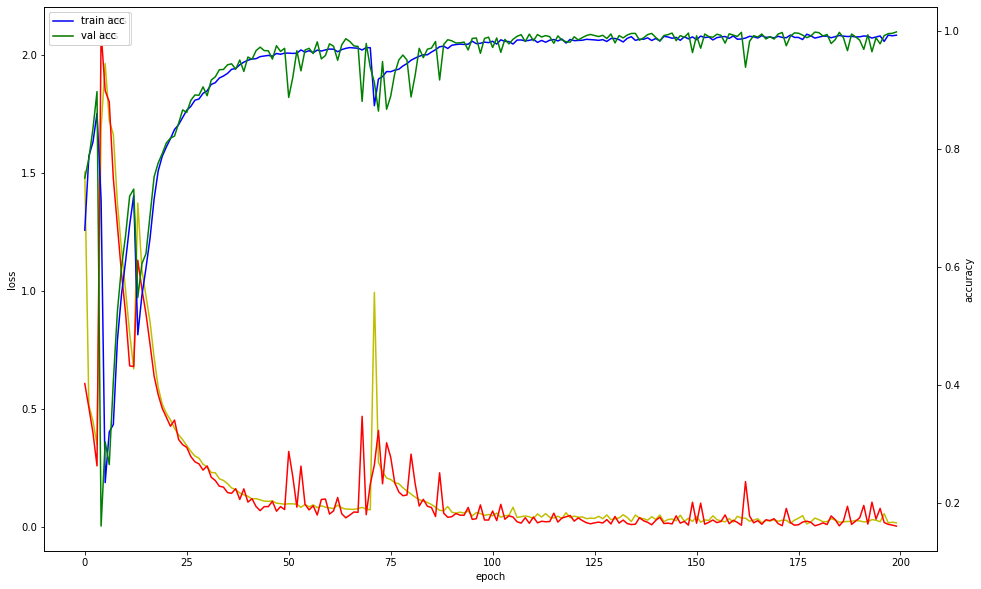

In [15]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [16]:
model = load_model('models/model.h5')

In [17]:
y_pred = model.predict(x_val)

225/225 [==============================] - 5s 18ms/step


In [18]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[6287,    0],
        [   0,  907]],

       [[6264,    0],
        [   0,  930]],

       [[6284,    0],
        [   0,  910]],

       [[6241,    2],
        [   2,  949]],

       [[6270,    0],
        [   0,  924]],

       [[6475,    0],
        [   2,  717]],

       [[6292,    0],
        [   2,  900]],

       [[6239,    4],
        [   0,  951]]], dtype=int64)